<a href="https://colab.research.google.com/github/baruchais/Logistic-and-Linear-Regression-Workshop/blob/main/Regression_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome to the Regression workshop!

The Regression basics workshop is aimed is at providing a basic understanding of the fundamentals of logistic and linear regression in machine learning. Using the Sckit-Learn library, participants will be able to gain insights into the concepts and applications of these powerful modeling techniques. Presented by the Data Science committee from AIS.

We will be focusing on 2 supervised learning algorithms: logstic and linear regression

Supervised: Has label(aka Y value)
Unsupervised: No label(no Y)

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

Introducing: Linear Regression

Dataset:https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction

In [ ]:
#loading in dataset
df=pd.read_csv("/content/real_estate.csv")
#checking the first 10 values
df.head(10)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [ ]:
df.shape

(414, 8)

In [ ]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

No                                        414
X1 transaction date                        12
X2 house age                              236
X3 distance to the nearest MRT station    259
X4 number of convenience stores            11
X5 latitude                               234
X6 longitude                              232
Y house price of unit area                270
dtype: int64

In statitics, we usually have a line that looks something like this: y=mx+b.

Y is our dependent variable, x our independent variable,m the slope, and b the intercept.

We have the same thing here. Except, here we have multiple independent variables, so it will something like this: y=mx1+mx2+mx3+...+mxn+b

In [ ]:
#Create our variables
y = df['Y house price of unit area']
X = df.drop(columns = 'Y house price of unit area',axis = 1)#you need axis=1 since our features are vertical, axis=0 is horizontal

Now that we have our variables, we need to split up our data even further into training and testing sets.

The training set is what our data will be trained on. It will use this data to create the model.

The testing set is what we will test ourn data on. We need to see how well this data will generalize to unseen data. (Will show how accurate it actually is)

In [ ]:
#Creating the training and testing sets
#Test size is how much of the data we want to save to test.
#Random state basically randomizes how we split our data, so it will help us reproduce the same data to test and train on later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

**Let's create the actual model!**

In [ ]:
#1. Creating the LinearRegression model object and assign to variable 'lr_model'
lr_model = LinearRegression()

# 2. Fitting the model to the training data below(chosing m and b)
lr_model.fit(X_train, y_train)

# 3. Calling predict() to make predictions on the test data
y_lr_pred = lr_model.predict(X_test)

# 4: Compute the RMSE and R2 (on y_test and y_lr_pred) and save the results to lr_rmse and lr_r2
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)
#lr_accuracy = accuracy_score(y_test, y_lr_pred)


print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))#how close our estimated values to actual values are
print('[LR] R2: {0}'.format(lr_r2))#the percentage of variance that is explained by the independent variables#
#print('[LR] accuracy: {0}'.format(lr_accuracy))
#tell me why there will be an arror with accuracy?


#basically, the higher the r2 the closer the actual values are to the predicted values

[LR] Root Mean Squared Error: 8.755184916691523
[LR] R2: 0.5491763455238137


Accuracy score only works for classification.

Does anyone notice anything about our result?
Maybe we can find a way to improve it!

In [ ]:
#So let's take a look
#Firstly, I want to check correlation
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

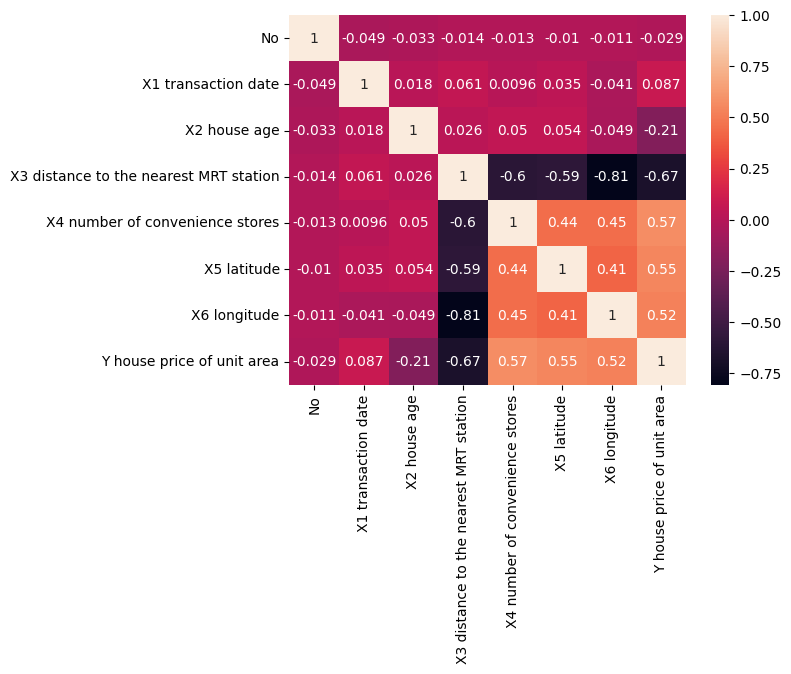

In [ ]:
#heatmap
sns.heatmap(df.corr(),annot=True)
#annot true gives us number in each cell

In [ ]:
#dropping low correlation values
df=df.drop(['X1 transaction date','No'],axis=1)

In [ ]:
#Now I will rerun our model:
y = df['Y house price of unit area']
X = df.drop(columns = 'Y house price of unit area', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)


print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 8.960644541133197
[LR] R2: 0.5277689403158933


In [ ]:
#Looking at these results yes r2 and rmse were lowered because there was an indpendent variable taken away
#Remember more variables isnt always better
#There are also different ways to assess accuracy

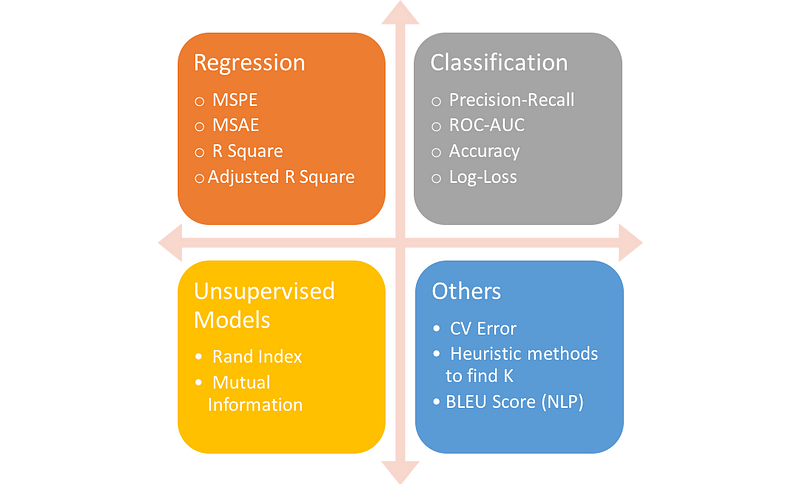

Okay so let's try another way to improve this model!
Let's try assesing multicollinearity.


What is multicollinearity and why is it important?
Multicollinearity is when two independent variables are correlated to one another. This becomes an issue because our independent variable will not be as statistically significant as it is. Thus, it can make our model less reliable.




So, to check for multicollinearity I need to find the VIF score
VIF stands for variance inflation factor. It measures the correlation between independent factors.


For all our stats people it looks like this:
VIF=1/1-R^2


Usually, a VIF above 5 indicates that there is multicollinearity


In [ ]:
# FYI, I took this code from a website called geeks for geeks(https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/)
#we want to create a new dataframe for VIF
#X = df.drop(columns = 'Y house price of unit area', axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                                  feature           VIF
0                            X2 house age  3.470796e+00
1  X3 distance to the nearest MRT station  2.970976e+00
2         X4 number of convenience stores  4.732308e+00
3                             X5 latitude  5.913399e+06
4                            X6 longitude  5.913114e+06


<Axes: >

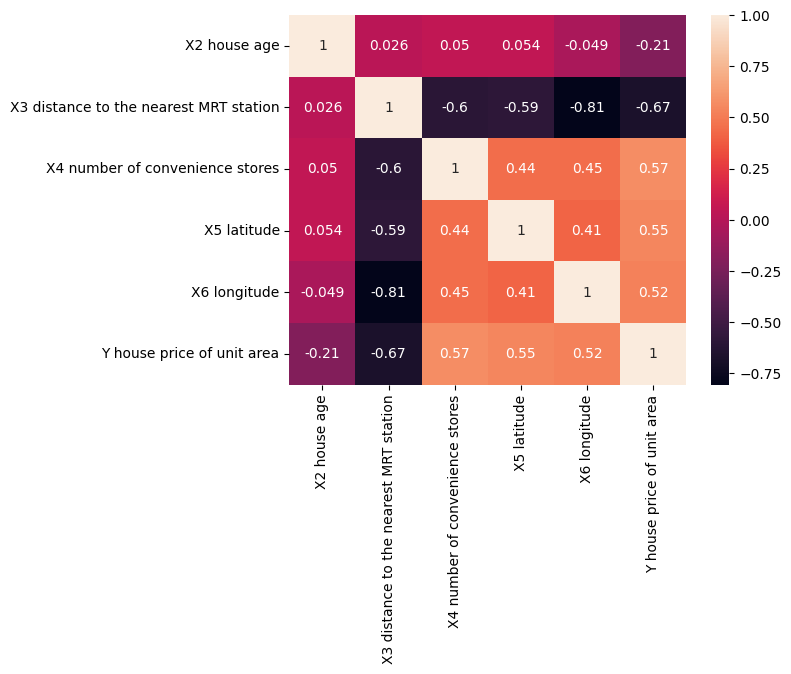

In [ ]:
#heatmap
sns.heatmap(df.corr(),annot=True)

In [ ]:
# So now i will drop the columns with high vif
df=df.drop(['X5 latitude','X6 longitude'],axis=1)

In [ ]:
#Now I will rerun our model:
y = df['Y house price of unit area']
X = df.drop(columns = 'Y house price of unit area')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)



print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))


[LR] Root Mean Squared Error: 9.268617704303507
[LR] R2: 0.49475038896404044


In [ ]:
#What can we see here?

Our model actually became worse. This is because even though long and lat had high VIF score, they contibuted important information to our model. This resulted in a decrease in R-squared value and an increase in MSE. So we have to remember to understand our context throughly.

We can also employ other techniques such as PCA, regularization methods, or variable selection approaches to help manage multicollinearity, all the while retaining crucial information for ourmodel performance.

We could also try hyperparameter tuning to improve our model; but unfortuntely we dont have enough time to go in this workshop.
If you guys enjoyed maybe we could do a workshop next semester on it!

Let's start of with Logistical Regression!

Let's get the dataset from: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [ ]:
#Same preperation as before
#loading in dataset
df=pd.read_csv("diabetes_prediction_dataset.csv")
#checking the first 10 values
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df.duplicated().sum()

3854

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(96146, 9)

In [ ]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [ ]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
#Droping smoking_history for now (because it is an object)
#We could do dummy encoding, which would result in addition of 6 columns
df = df.drop(columns= 'smoking_history',axis=1)

In [ ]:
#Let's double check this
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
#gender is also a object; so let's see what values there are for it
df.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

The ways to fix this is to use a method called get_dummies.It converts categorical variablers to dummy variables(which are 1's and 0's)

In [ ]:
df1= pd.get_dummies(df['gender'])#getting 3 columns new coluns with 1's and 0's
df=df.join(df1)#adding our new columns to the data frame
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other
0,Female,80.0,0,1,25.19,6.6,140,0,1,0,0
1,Female,54.0,0,0,27.32,6.6,80,0,1,0,0
2,Male,28.0,0,0,27.32,5.7,158,0,0,1,0
3,Female,36.0,0,0,23.45,5.0,155,0,1,0,0
4,Male,76.0,1,1,20.14,4.8,155,0,0,1,0


Looking at our columns, what do you think we should do next?

In [ ]:
# Remember to drop the gender column; we dont want to train our data on two gender features
df=df.drop(['gender'],axis=1)#remember to save into df

In [ ]:
#if you dont know paramters, do this:
df.drop?

In [ ]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other
0,80.0,0,1,25.19,6.6,140,0,1,0,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0


In [ ]:
#now let's build our model like we did before
#Create our variables
X = df.drop(columns = ['diabetes'],axis=1)
y = df['diabetes']

#split into training and tetsing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

#Creating the LogisticRegression model object and assign to variable 'lg_model'
lg_model = LogisticRegression()

#Fitting the model to the training data below
lg_model.fit(X_train, y_train)

# Calling predict() to make predictions on the test data
y_lg_pred = lg_model.predict(X_test)

#Compute the RMSE and R2 (on y_test and y_lr_pred) and save the results to lg_rmse and lg_r2
lg_rmse = mean_squared_error(y_test, y_lg_pred, squared=False)
lg_r2 = r2_score(y_test, y_lg_pred)
lg_accuracy = accuracy_score(y_test, y_lg_pred)


print('[LG] Root Mean Squared Error: {0}'.format(lg_rmse))
print('[LG] R2: {0}'.format(lg_r2))
print('[LG] accuracy: {0}'.format(lg_accuracy))

[LG] Root Mean Squared Error: 0.20532368214637495
[LG] R2: 0.4637497990837408
[LG] accuracy: 0.9578421855498543


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Just like before, let's check our results
df.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other
age,1.000000,0.257305,0.238451,0.344797,0.106719,0.114317,0.264927,0.028785,-0.028580,-0.007456
hypertension,0.257305,1.000000,0.119982,0.148111,0.081441,0.084834,0.195710,-0.014129,0.014240,-0.003969
heart_disease,0.238451,0.119982,1.000000,0.061376,0.068140,0.070832,0.170711,-0.078456,0.078539,-0.002822
bmi,0.344797,0.148111,0.061376,1.000000,0.084423,0.092543,0.214932,0.023484,-0.023488,0.000117
HbA1c_level,0.106719,0.081441,0.068140,0.084423,1.000000,0.171615,0.406408,-0.019897,0.019944,-0.001620
blood_glucose_level,0.114317,0.084834,0.070832,0.092543,0.171615,1.000000,0.424336,-0.017834,0.017824,0.000410
diabetes,0.264927,0.195710,0.170711,0.214932,0.406408,0.424336,1.000000,-0.037763,0.037883,-0.004256
Female,0.028785,-0.014129,-0.078456,0.023484,-0.019897,-0.017834,-0.037763,1.000000,-0.999615,-0.016217
Male,-0.028580,0.014240,0.078539,-0.023488,0.019944,0.017824,0.037883,-0.999615,1.000000,-0.011542
Other,-0.007456,-0.003969,-0.002822,0.000117,-0.001620,0.000410,-0.004256,-0.016217,-0.011542,1.000000


<Axes: >

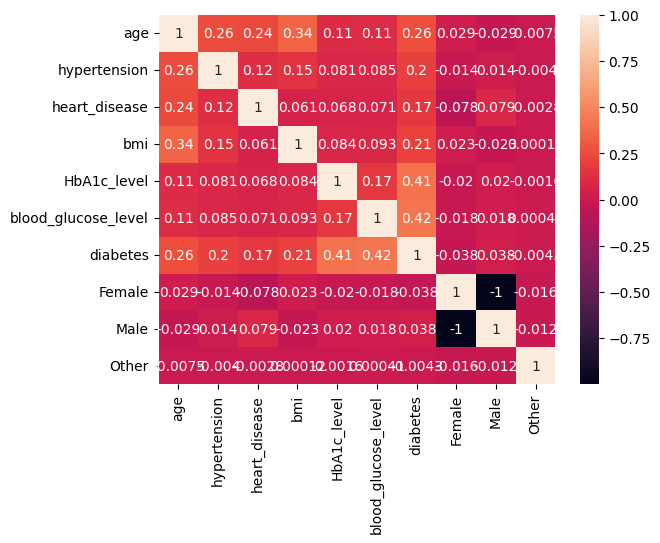

In [ ]:
sns.heatmap(df.corr(),annot=True)

Thank you everyone!!